In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/codsoft/spam.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [ ]:
if df is not None:
    df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)
else:
    print("DataFrame is None, please check the data loading process.")


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1': 'Label', 'v2': 'Email'}, inplace=True)
df

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


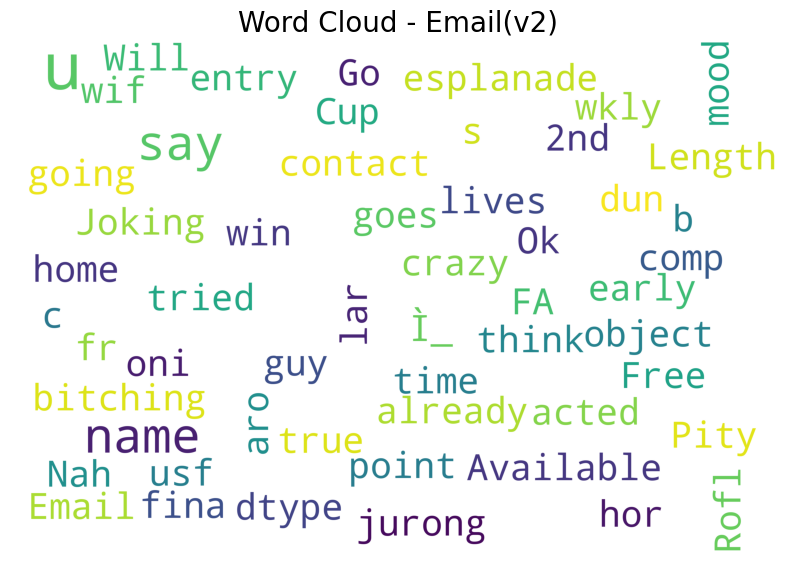

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=100,
    scale=3,
    random_state=42,
    colormap='viridis',
    width=1200,
    height=800).generate(str(df['Email']))

plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Word Cloud - Email(v2)', fontsize=20)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
df.Label.value_counts()


Label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

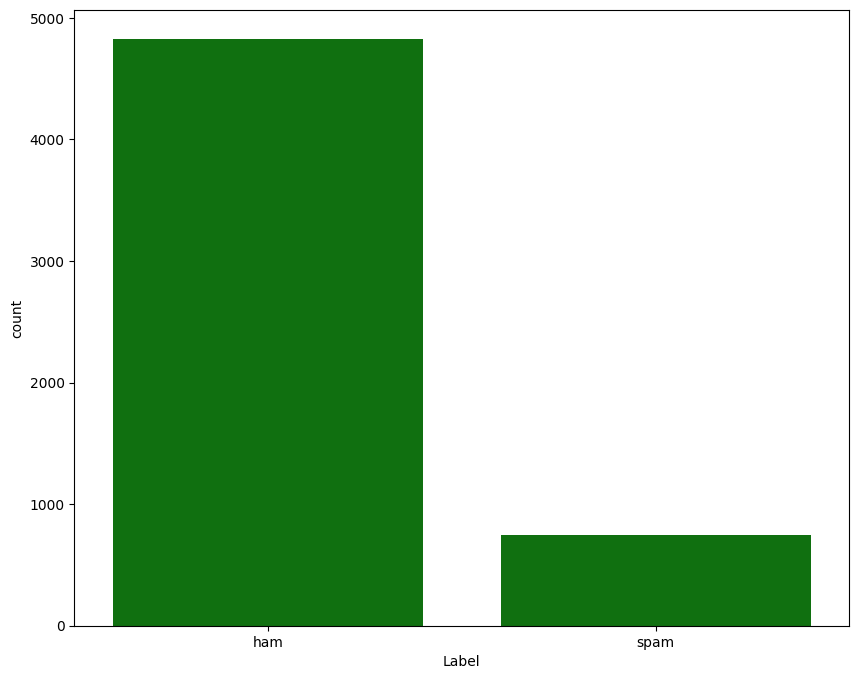

In [ ]:
sns.countplot(x='Label',data=df,color='g')


In [ ]:
df.dtypes

Label    object
Email    object
dtype: object

In [ ]:
df.isna().sum()


Label    0
Email    0
dtype: int64

In [ ]:
df['Email']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Email, Length: 5572, dtype: object

In [ ]:
tk=TweetTokenizer()
df['Email']=df['Email'].apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))

df['Email']

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ì_ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Email, Length: 5572, dtype: object

In [ ]:
# remove special characters
df['Email']=df['Email'].str.replace('[^a-zA-Z0-9]',' ',regex=True)
df['Email']

0       Go until jurong point   crazy    Available onl...
1                         Ok lar     Joking wif u oni    
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor     U c already then sa...
4       Nah I don t think he goes to usf   he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will    b going to esplanade fr home  
5569    Pity     was in mood for that   So     any oth...
5570    The guy did some bitching but I acted like i d...
5571                          Rofl   Its true to its name
Name: Email, Length: 5572, dtype: object

In [ ]:
# remove the words having less than 3 characters

df['Email']=df['Email'].apply(lambda x:' '.join((w for w in tk.tokenize(x) if len(w)>=3)))
df['Email']

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts 21st M...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Email, Length: 5572, dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['Email'] = df['Email'].apply(lambda x: ' '.join([w for w in tk.tokenize(x) if len(w) >= 3 and w.lower() not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stm=SnowballStemmer('english')
df['Email']=df['Email'].apply(lambda x: [stm.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
# to remove the tail and convert it into lowercase
df['Email']

0       jurong point crazi avail bugi great world buff...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Email, Length: 5572, dtype: object

In [ ]:
# vectorization
# we use the method TFIDF method
senti=df['Email']

vec=TfidfVectorizer()
data=vec.fit_transform(senti)
data

<5572x6819 sparse matrix of type '<class 'numpy.float64'>'
	with 43346 stored elements in Compressed Sparse Row format>

In [ ]:
x=data
x

<5572x6819 sparse matrix of type '<class 'numpy.float64'>'
	with 43346 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['Label'].values
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)


In [ ]:
y_resampled_series = pd.Series(y_resampled)
value_counts = y_resampled_series.value_counts()
print(value_counts)


ham     4825
spam    4825
Name: count, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [ ]:
knn=KNeighborsClassifier()
sv=SVC()
nav=MultinomialNB()
dtree=DecisionTreeClassifier()
rforest=RandomForestClassifier()
lst=[knn,sv,nav,dtree,rforest]
for i in lst:
  print('Model started')
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Predicted value is: ",y_pred)
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion matrix is: ')
  print(cm)
  score=accuracy_score(y_test,y_pred1)
  print('Accuracy score is: ',score*100,'%')
  print('Classification Report ')
  print(classification_report(y_test,y_pred))


Model started
KNeighborsClassifier()
Predicted value is:  ['ham' 'ham' 'ham' ... 'spam' 'ham' 'spam']
Confusion matrix is: 
[[1452    2]
 [  29 1412]]
Accuracy score is:  98.92918825561313 %
Classification Report 
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1454
        spam       1.00      0.98      0.99      1441

    accuracy                           0.99      2895
   macro avg       0.99      0.99      0.99      2895
weighted avg       0.99      0.99      0.99      2895

Model started
SVC()
Predicted value is:  ['ham' 'ham' 'ham' ... 'spam' 'ham' 'spam']
Confusion matrix is: 
[[1453    1]
 [   3 1438]]
Accuracy score is:  98.92918825561313 %
Classification Report 
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1454
        spam       1.00      1.00      1.00      1441

    accuracy                           1.00      2895
   macro avg       1.00      1.00      1.00 